In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train:  (50000, 32, 32, 3)


In [3]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

w1: (3072, 10)
b1: (10,)


In [4]:
iterations = 300
lr = 1.4e-2
lr_decay=0.99
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
testing_loss_history=[]

for t in range(1,1+iterations):
    # Forward pass
    h=x_train.dot(w1)+b1
    loss_function=(1./Ntr)*np.sum((h-y_train)**2)+ reg*np.sum(w1**2)
    loss_history.append(loss_function)
    
   
    train_pred=np.argmax(h,axis=1)
    train_real=np.argmax(y_train,axis=1)
    train_acc=np.mean(train_pred==train_real)
    train_acc_history.append(train_acc)
    
    val_pred=np.argmax(x_test.dot(w1),axis=1)
    val_real=np.argmax(y_test,axis=1)
    val_acc=np.mean(val_pred==val_real)
    val_acc_history.append(val_acc)
    
    testing_loss= (1./Nte)*np.sum(( (x_test.dot(w1)+b1) - y_test)**2) + reg*np.sum(w1**2) 
    testing_loss_history.append(testing_loss)
    
    if (t%30==0) or t==1:
        print('iteration %d/%d: Loss %f, train_acc %f, val_acc %f, testing_loss %f'% (t,iterations,loss_function,train_acc,val_acc,testing_loss))
    # Backward pass
    dy_pred = (1./Ntr)*2.0*(h -y_train) # partial derivative of L w.r.t y_hat
    dw1 = x_train.T.dot(dy_pred) + reg*w1 
    db1 = dy_pred.sum(axis =0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay

    
    
    
#indices = np.arange(Ntr)
#rng.shuffle(indices)



iteration 1/300: Loss 1.000051, train_acc 0.079000, val_acc 0.079700, testing_loss 1.000054
iteration 30/300: Loss 0.830775, train_acc 0.377980, val_acc 0.379100, testing_loss 0.906933
iteration 60/300: Loss 0.808083, train_acc 0.390780, val_acc 0.389300, testing_loss 0.900588
iteration 90/300: Loss 0.800634, train_acc 0.396060, val_acc 0.391900, testing_loss 0.897900
iteration 120/300: Loss 0.797301, train_acc 0.399500, val_acc 0.393700, testing_loss 0.896418
iteration 150/300: Loss 0.795499, train_acc 0.401420, val_acc 0.394700, testing_loss 0.895500
iteration 180/300: Loss 0.794407, train_acc 0.402440, val_acc 0.395800, testing_loss 0.894897
iteration 210/300: Loss 0.793700, train_acc 0.403380, val_acc 0.396100, testing_loss 0.894485
iteration 240/300: Loss 0.793221, train_acc 0.404160, val_acc 0.396100, testing_loss 0.894197
iteration 270/300: Loss 0.792889, train_acc 0.404560, val_acc 0.396100, testing_loss 0.893992
iteration 300/300: Loss 0.792653, train_acc 0.404720, val_acc 0.3

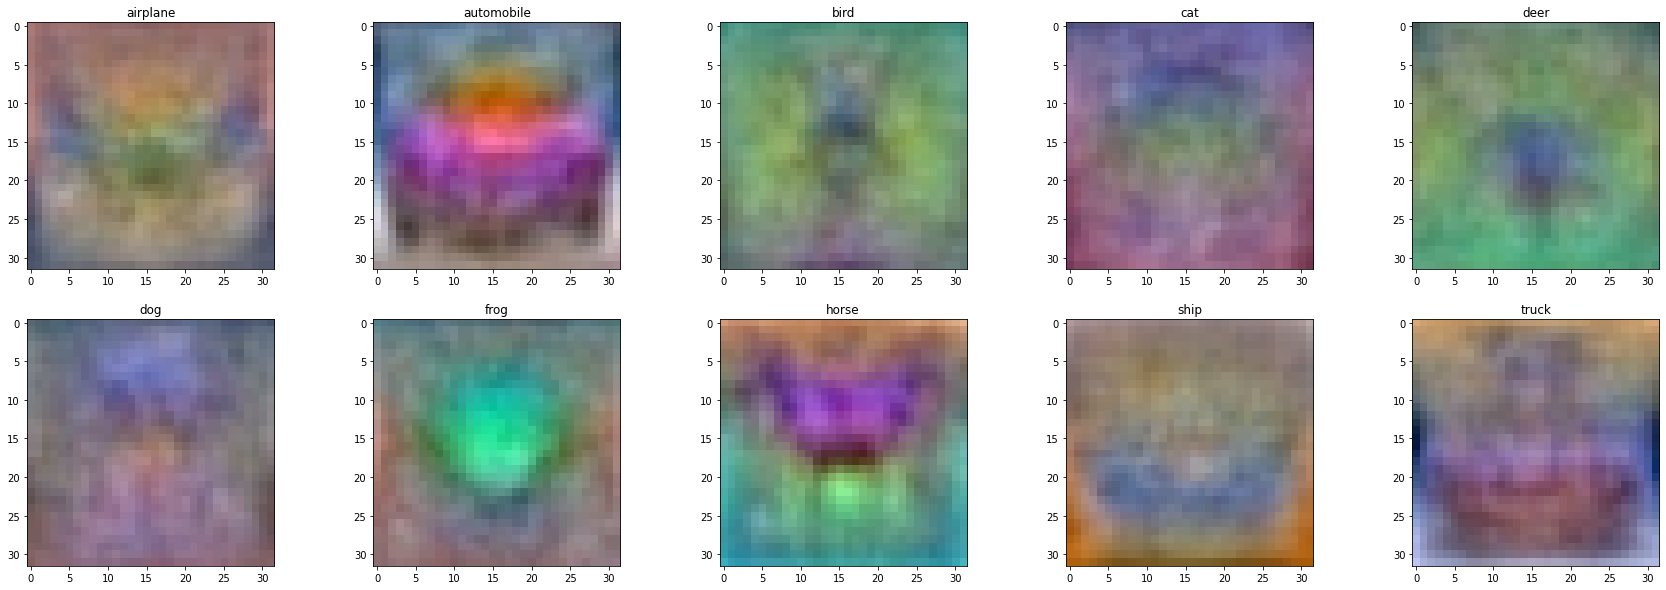

In [6]:
weights =  w1- np.min(w1)
images = ((weights/np.max(weights))*255).astype('uint8')
fig,axes=plt.subplots(2,5,figsize=(30,10))
plot_number=1
titles=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(K):
    image=images[:,i].reshape(32,32,3)
    plt.subplot(2,5,plot_number),plt.imshow(image[:,:,::-1])
    title_name=titles[i]
    plt.title(title_name)
    plot_number+=1

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) 
Ntr = x_train.shape[0]
Nte = x_test.shape[0]


Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)


x_train = x_train - mean_image
x_test = x_test - mean_image


y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)


x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=5e-6
H=200
w1=std*np.random.randn(Din, H)
w2=std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = Ntr

iterations = 300
lr = 0.5e-2
lr_decay=0.99
reg =10e-7

loss_history = []
train_acc_history = []
val_acc_history = []
testing_loss_history=[]

for i in range(1,iterations+1):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    h = 1/(1+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2) + b2
    loss = (1/batch_size) * np.square(y_pred-y).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))
    loss_history.append(loss)
    
    if i % 30 == 0 or i==1:
        print('iteration', i, loss)
    
    dy_pred = (1./batch_size)*2*(y_pred-y)
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= 100*lr*dw1
    w2 -= lr*dw2
    b1 -= 100*lr*db1
    b2 -= lr*db2
    alpha =  lr* lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 1 0.9999903850312247
iteration 30 0.8405164130345621
iteration 60 0.8221410865047716
iteration 90 0.8058880022117068
iteration 120 0.7910030944906475
iteration 150 0.7810251625063218
iteration 180 0.7774343906944603
iteration 210 0.7646853263265847
iteration 240 0.761009427814586
iteration 270 0.755467167901563


<ipython-input-20-53c250a9dd67>:59: RuntimeWarning: overflow encountered in exp
  h = 1/(1+np.exp(-(x.dot(w1)+b1)))


iteration 300 0.7541736890984383


In [21]:
h1 = 1/(1+np.exp(-(x_test.dot(w1)+b1)))
pred1 = h1.dot(w2) + b2
val_pred = np.argmax(pred1, axis=1)
y_t = np.argmax(y_test,axis=1)
val_acc = np.mean(y_t == val_pred)
test_loss = (1/Nte) * np.square(pred1-y_test).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))



h2 = 1/(1+np.exp(-(x_train.dot(w1)+b1)))
pred2 = h2.dot(w2) + b2
train_pred = np.argmax(pred2, axis=1)
y_t = np.argmax(y_train,axis=1)
train_acc = np.mean(y_t == train_pred)
train_loss = (1/Ntr) * np.square(pred2-y_train).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))

print('Train_acc',train_acc)
print('Val_acc',val_acc)
print('Training loss',train_loss)
print('test_loss',test_loss)


Train_acc 0.44164
Val_acc 0.4097
Training loss 0.7529924960857283
test_loss 0.7736564528745107


<ipython-input-21-4dec0361c352>:10: RuntimeWarning: overflow encountered in exp
  h2 = 1/(1+np.exp(-(x_train.dot(w1)+b1)))


In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) 
Ntr = x_train.shape[0]
Nte = x_test.shape[0]


Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)


x_train = x_train - mean_image
x_test = x_test - mean_image


y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)


x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=5e-6
H=200
w1=std*np.random.randn(Din, H)
w2=std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = 500

iterations = round(Ntr/batch_size)*300
lr = 0.5e-2
lr_decay=0.99
reg =5e-6

loss_history = []
train_acc_history = []
val_acc_history = []
testing_loss_history=[]

for i in range(1,iterations+1):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    h = 1/(1+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2) + b2
    loss = (1/batch_size) * np.square(y_pred-y).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))
    loss_history.append(loss)
    
    if i % 500 == 0 or i==1:
        print('iteration', i, loss)
    
    dy_pred = (1./batch_size)*2*(y_pred-y)
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= 100*lr*dw1
    w2 -= lr*dw2
    b1 -= 100*lr*db1
    b2 -= lr*db2
    lr =  lr* lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 1 0.9999973217258136
iteration 500 0.7698507185914144
iteration 1000 0.7797367241586335
iteration 1500 0.782234482928493
iteration 2000 0.7785879092447032
iteration 2500 0.7873333778748887
iteration 3000 0.7729239426653797
iteration 3500 0.7718928488216411
iteration 4000 0.771022546612575
iteration 4500 0.7904742068305124
iteration 5000 0.7816542118777989
iteration 5500 0.7780415055006948
iteration 6000 0.7819473785579342
iteration 6500 0.7666306996482614
iteration 7000 0.7822774806700032
iteration 7500 0.7950259677734766
iteration 8000 0.7651274226013083
iteration 8500 0.7918265303976296
iteration 9000 0.7718103737981227
iteration 9500 0.7842618378315596
iteration 10000 0.7759865367947625
iteration 10500 0.7757489798957594
iteration 11000 0.7882208534247623
iteration 11500 0.7800069265541589
iteration 12000 0.7868131328467763
iteration 12500 0.7816618115842409
iteration 13000 0.7720200542970737
iteration 13500 0.784425519919

KeyboardInterrupt: 

In [32]:
h1 = 1/(1+np.exp(-(x_test.dot(w1)+b1)))
pred1 = h1.dot(w2) + b2
val_pred = np.argmax(pred1, axis=1)
y_t = np.argmax(y_test,axis=1)
val_acc = np.mean(y_t == val_pred)
test_loss = (1/Nte) * np.square(pred1-y_test).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))



h2 = 1/(1+np.exp(-(x_train.dot(w1)+b1)))
pred2 = h2.dot(w2) + b2
train_pred = np.argmax(pred2, axis=1)
y_t = np.argmax(y_train,axis=1)
train_acc = np.mean(y_t == train_pred)
train_loss = (1/Ntr) * np.square(pred2-y_train).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))

print('Train_acc',train_acc)
print('Val_acc',val_acc)
print('Training loss',train_loss)
print('test_loss',test_loss)

Train_acc 0.40088
Val_acc 0.3915
Training loss 0.7831319803735506
test_loss 0.7881498361440616


In [ ]:
%reload_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()       #load data

K = len(np.unique(y_train)) 
   
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3),name='C32'))        
model.add(layers.MaxPooling2D((2,2)))                                               
model.add(layers.Conv2D(64,(3,3), activation='relu',name='C64_1' ))                              
model.add(layers.MaxPooling2D((2,2)))                                               
model.add(layers.Conv2D(64,(3,3), activation='relu', name='C64_2' ))                              
model.add(layers.MaxPooling2D((2,2)))                                              
model.add(layers.Flatten())                                                         
model.add(layers.Dense(64, activation='relu', name='F64' ))                                     
model.add(layers.Dense(10, name='F10'))                                                         

model.summary()     

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.999, momentum =0.9, name='optimizer') 
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 

history = model.fit(x_train, y_train, epochs=40, batch_size=50, validation_data=(x_test, y_test))

print(model.optimizer.get_config())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C32 (Conv2D)                 (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
C64_1 (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
C64_2 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              